In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
rng = np.random.default_rng()

In [51]:
def gauss(x, u, s):
    return np.exp(-(x-u)**2/2/s**2) / s / np.sqrt(2*np.pi)

def uniform(x, a, b):
    if (x<b and x>a):
        return 1/(b-a)
    else: 
        return 1e-10

In [5]:
n_steps = 1e5
mu = 2
sig = np.sqrt(2)

prop_sig = 1

In [25]:
xlist = np.array([0])
i = 1
while i < n_steps:
    prop = xlist[i-1] + rng.normal(0, prop_sig)
    r = rng.random()

    if np.log(gauss(prop, mu, sig)) - np.log(gauss(xlist[i-1],mu,sig)) > np.log(r):
        xlist = np.concatenate((xlist,[prop]))
        i+=1

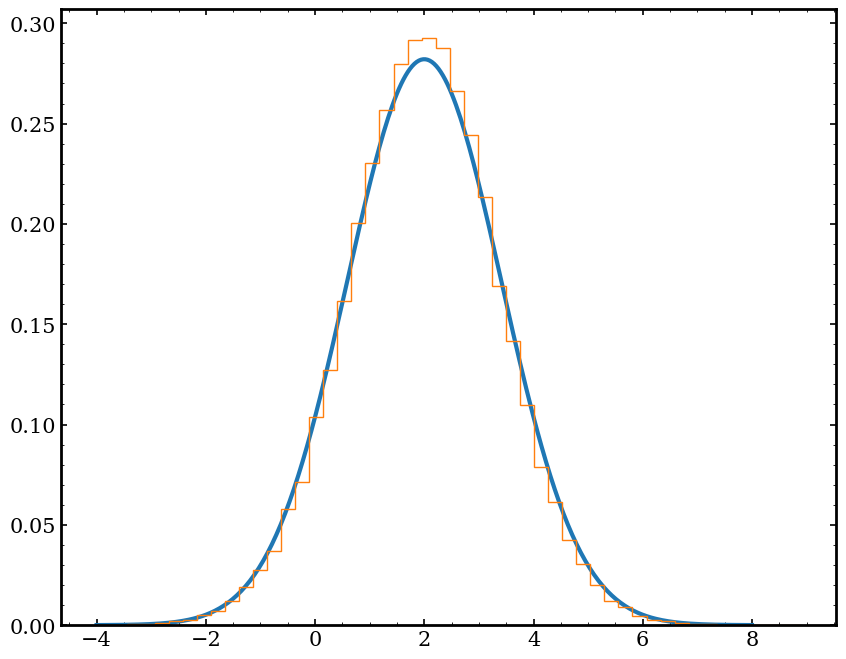

In [36]:
xs = np.linspace(-4, 8, 300)
ys = gauss(xs, mu, sig)

pl.plot(xs, ys)
pl.hist(xlist[500:], bins=50, histtype="step", density=True)
pl.show()

array([  0.        ,   1.21175801,   1.90628404, ..., 254.85453545,
       256.36411341, 256.12213322])

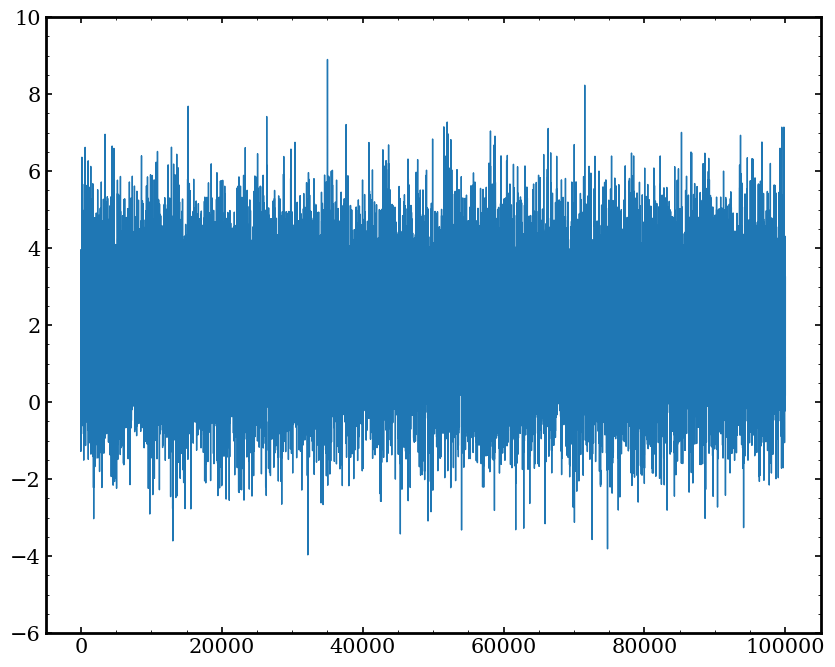

In [33]:
pl.plot(np.arange(len(xlist)), xlist, lw=1)
pl.ylim(-6, 10)
pl.show()

In [76]:
xlist = np.array([4])
i = 1
while i < n_steps:
    prop = xlist[i-1] + rng.uniform(-0.5, 0.5)
    r = rng.random()

    if uniform(prop, 3,7) / uniform(xlist[i-1], 3, 7) > r:
        xlist = np.concatenate((xlist,[prop]))
        i+=1

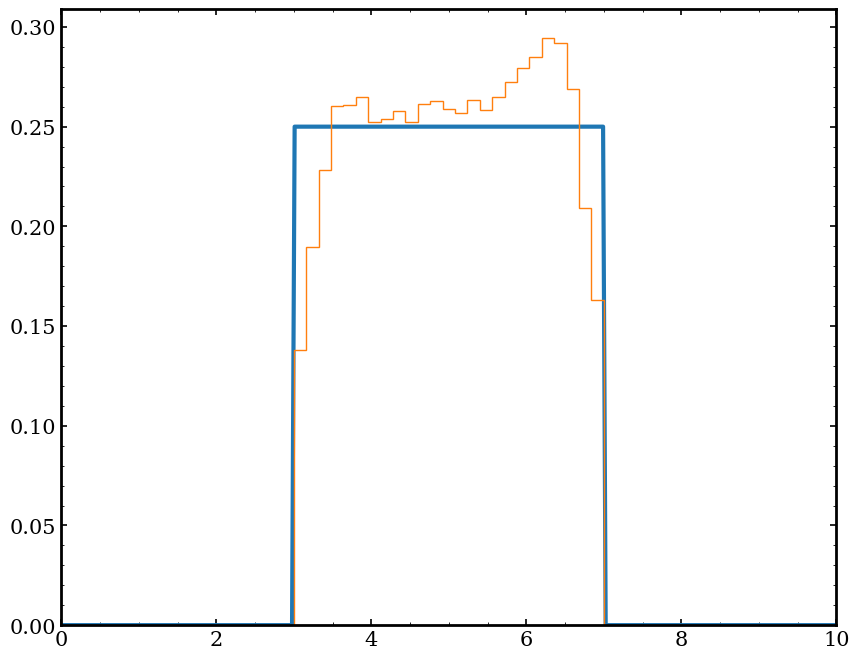

In [77]:
xs = np.linspace(0, 10, 300)
ys = [uniform(x, 3, 7) for x in xs]

pl.plot(xs, ys)
pl.hist(xlist[20000:], bins=25, histtype="step", density=True)

pl.xlim(0,10)

pl.show()